In [3]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:

from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.concat([X,y],axis=1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
# Export DataFrame to a CSV file
df.to_csv("income_data.csv", index=False)


In [8]:
df.shape

(48842, 15)

In [9]:
df.reset_index(drop=True,inplace=True)

In [10]:
(df.isnull().sum()/len(df))*100

age               0.000000
workclass         1.971664
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        1.977806
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    0.560993
income            0.000000
dtype: float64

## evident null values are present in some columns

In [11]:
df[df.duplicated()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [12]:
df.duplicated().sum()

29

29 evident duplicates are present

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [14]:
# There are null values in workclass, occupation and native-country
# They are categorical columns
# So we can treat the null values with mode

for col in df.select_dtypes(include='object').columns:
  df[col].fillna(df[col].mode()[0],inplace=True)

C:\Users\rockz\AppData\Local\Temp\ipykernel_9548\1686883141.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)


In [15]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [16]:
df.columns=df.columns.str.replace('-','_')

In [17]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [18]:
cat_cols=df.select_dtypes(include='object').columns
print(f"Categorical columns are {cat_cols}")
num_cols=df.select_dtypes(exclude='object').columns
print(f"Numerical columns are {num_cols}")

Categorical columns are Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')
Numerical columns are Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')


In [19]:
# Checking the unique values in each column
for col in cat_cols:
  print(f"Unique values in {col} are {df[col].unique()}")
  print()

Unique values in workclass are ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Unique values in education are ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Unique values in marital_status are ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Unique values in occupation are ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

Unique values in relationship are ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

Unique values in race are ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

Unique values

In [20]:
for col in cat_cols:
  print(f"Value count of each unique element in {col}: {df[col].value_counts()}")
  print()

Value count of each unique element in workclass: workclass
Private             34869
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

Value count of each unique element in education: education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

Value count of each unique element in marital_status: marital_status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-abs

In [21]:
df[df['native_country']=='United-States']

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [22]:
df['native_country'].value_counts()/len(df)*100

native_country
United-States                 90.303427
Mexico                         1.947095
?                              1.193645
Philippines                    0.603988
Germany                        0.421768
Puerto-Rico                    0.376725
Canada                         0.372630
El-Salvador                    0.317350
India                          0.309160
Cuba                           0.282544
England                        0.260022
China                          0.249785
South                          0.235453
Jamaica                        0.217026
Italy                          0.214979
Dominican-Republic             0.210884
Japan                          0.188362
Guatemala                      0.180173
Poland                         0.178125
Vietnam                        0.176078
Columbia                       0.174031
Haiti                          0.153556
Portugal                       0.137177
Taiwan                         0.133082
Iran                     

In [23]:
# Clearly we can see that 90% of the data is present for the country of United States
# So we will be working on the data where the native_country is United States

In [24]:
new_df=df[df['native_country']=='United-States']
new_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [25]:
new_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [26]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44106 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             44106 non-null  int64 
 1   workclass       44106 non-null  object
 2   fnlwgt          44106 non-null  int64 
 3   education       44106 non-null  object
 4   education_num   44106 non-null  int64 
 5   marital_status  44106 non-null  object
 6   occupation      44106 non-null  object
 7   relationship    44106 non-null  object
 8   race            44106 non-null  object
 9   sex             44106 non-null  object
 10  capital_gain    44106 non-null  int64 
 11  capital_loss    44106 non-null  int64 
 12  hours_per_week  44106 non-null  int64 
 13  native_country  44106 non-null  object
 14  income          44106 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.4+ MB


In [27]:
cat_cols=new_df.select_dtypes(include='object').columns
print(f"Categorical columns are {cat_cols}")
num_cols=new_df.select_dtypes(include=np.number).columns
print(f"Numerical columns are {num_cols}")


Categorical columns are Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')
Numerical columns are Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')


In [28]:
new_df[num_cols].describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,44106.000000,4.410600e+04,44106.000000,44106.000000,44106.000000,44106.000000
mean,38.699769,1.871859e+05,10.173038,1093.039405,88.518456,40.438104
std,13.790543,1.051522e+05,2.397072,7479.897875,404.891647,12.470289
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.158030e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.766670e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.345370e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [29]:
new_df[cat_cols].describe().T

,count,unique,top,freq
workclass,44106,9,Private,31224
education,44106,16,HS-grad,14635
marital_status,44106,7,Married-civ-spouse,20127
occupation,44106,15,Prof-specialty,6461
relationship,44106,6,Husband,17832
race,44106,5,White,38680
sex,44106,2,Male,29412
native_country,44106,1,United-States,44106
income,44106,4,<=50K,21999


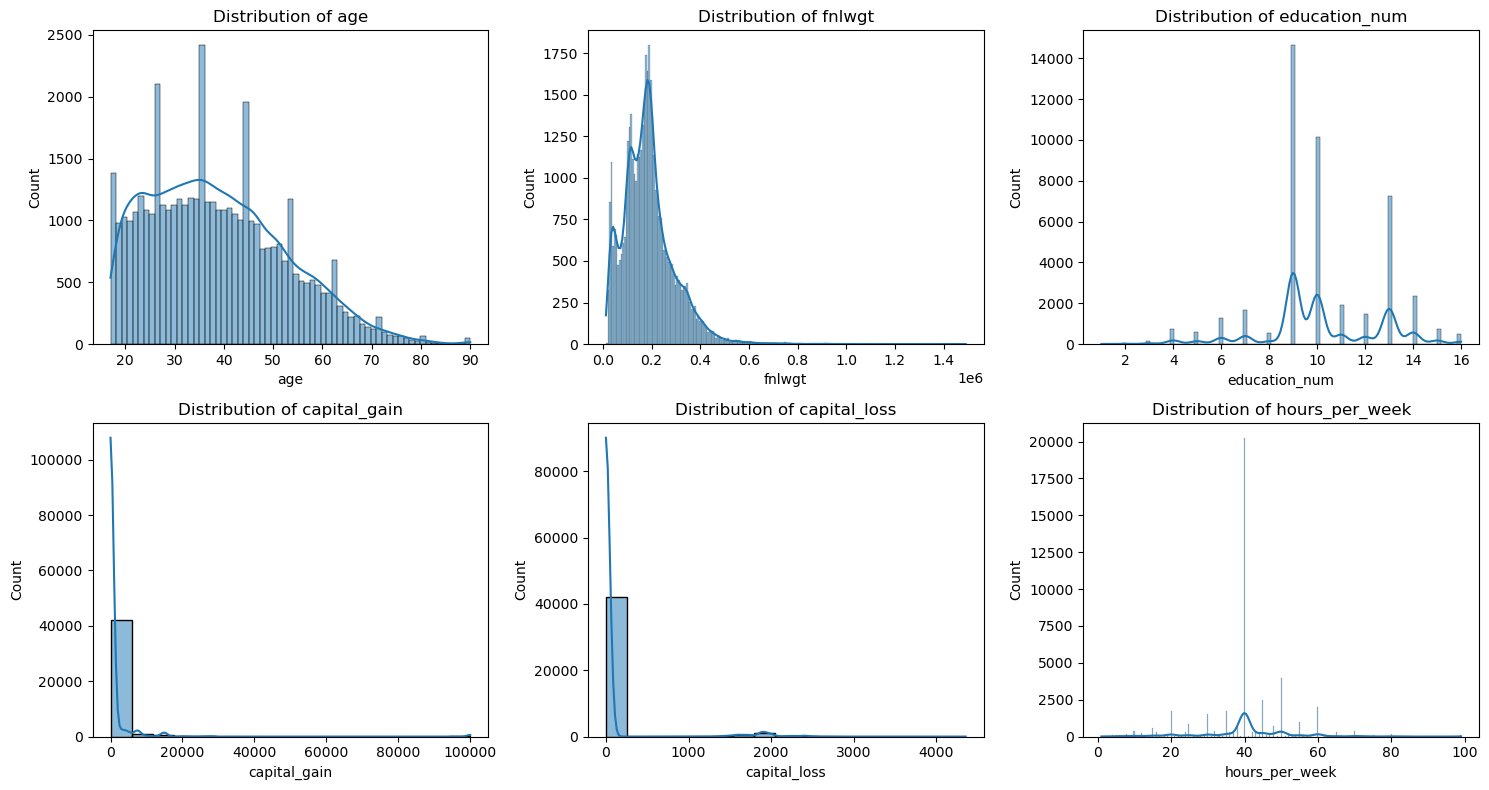

In [30]:
t=1
plt.figure(figsize=(15,8))
for col in num_cols:
  plt.subplot(2,3,t)
  sns.histplot(x=new_df[col],kde=True)
  plt.title(f"Distribution of {col}")
  t+=1
plt.tight_layout()
plt.show()

In [31]:
# Checking the unique values present in each categorical column
for col in cat_cols:
  print(f"Unique values in {col} are {new_df[col].unique()}")
  print('-------------------------------------------------------')

Unique values in workclass are ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' '?' 'Without-pay' 'Never-worked']
-------------------------------------------------------
Unique values in education are ['Bachelors' 'HS-grad' '11th' 'Masters' 'Some-college' 'Assoc-acdm'
 'Doctorate' '9th' 'Assoc-voc' '10th' '7th-8th' 'Prof-school' '1st-4th'
 'Preschool' '5th-6th' '12th']
-------------------------------------------------------
Unique values in marital_status are ['Never-married' 'Married-civ-spouse' 'Divorced' 'Separated'
 'Married-AF-spouse' 'Widowed' 'Married-spouse-absent']
-------------------------------------------------------
Unique values in occupation are ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Sales' 'Farming-fishing' 'Machine-op-inspct' 'Other-service'
 'Transport-moving' 'Tech-support' 'Craft-repair' 'Protective-serv' '?'
 'Armed-Forces' 'Priv-house-serv']
-------------------------------------------------------

In [32]:
# There are some anomalies present in the data
# In columns Workclass,Occupation, a '?' mark is present
# And as we have selected only the native_country as "United_states" there is only one value present in the column native_country
# So we will drop that column
# Also in our target column there are 2 values but wrongly typed a '.' after the <=50k and >50k
# So, we will remove the '.' mark

In [33]:
# salary={'<=50K.':'<=50K','>50K.':'>50K'}
# This we can map with the salary of new_df

In [34]:
# new_df['income']=new_df['income'].map(salary)
def clean(text):
  text=text.replace('.',"")
  return text

In [35]:
new_df['income']=new_df['income'].apply(clean)

C:\Users\rockz\AppData\Local\Temp\ipykernel_9548\3185392403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['income']=new_df['income'].apply(clean)


In [36]:
new_df['income'].value_counts(normalize=True)

income
<=50K    0.755861
>50K     0.244139
Name: proportion, dtype: float64

In [37]:
new_df.shape

(44106, 15)

In [38]:
# We can see that the target variable is not equally splitted

In [39]:
for col in cat_cols:
  new_df[col]=new_df[col].replace('?',np.nan)

C:\Users\rockz\AppData\Local\Temp\ipykernel_9548\4023342514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col]=new_df[col].replace('?',np.nan)


In [40]:
new_df.isnull().sum()

age                  0
workclass         1659
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1666
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
income               0
dtype: int64

In [41]:
for col in cat_cols:
  new_df[col]=new_df[col].fillna(new_df[col].mode()[0])

C:\Users\rockz\AppData\Local\Temp\ipykernel_9548\2592333148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col]=new_df[col].fillna(new_df[col].mode()[0])


In [42]:
new_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

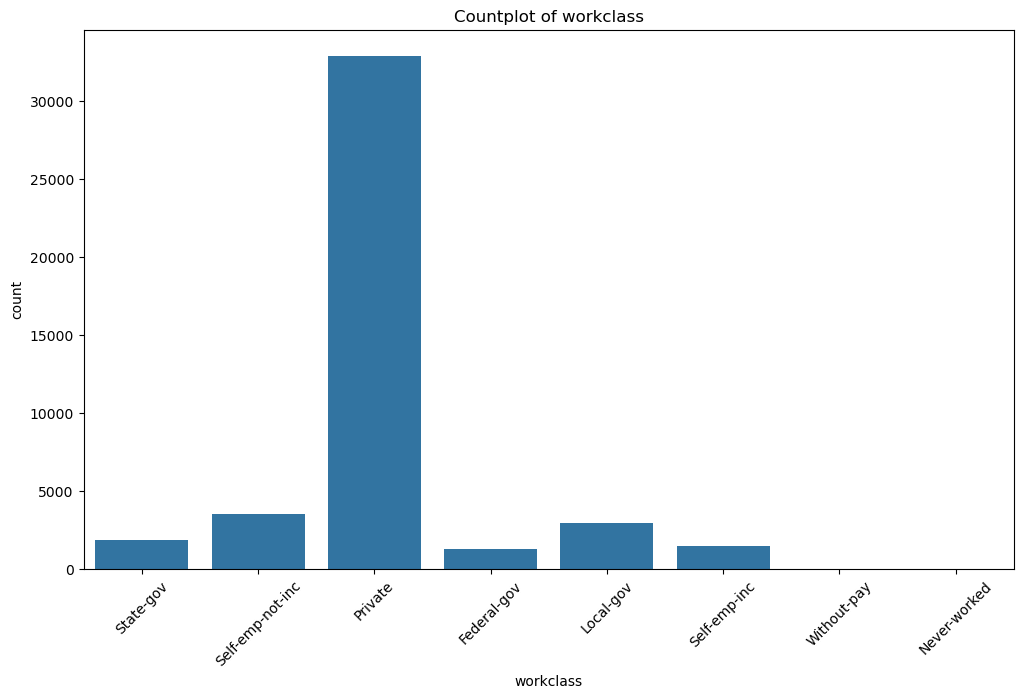

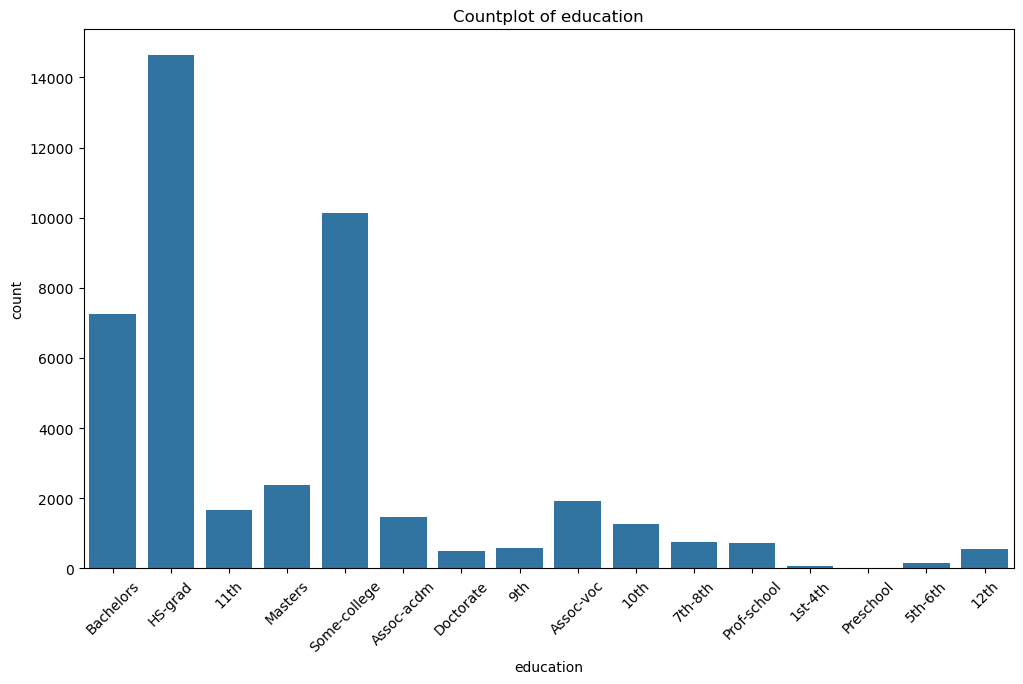

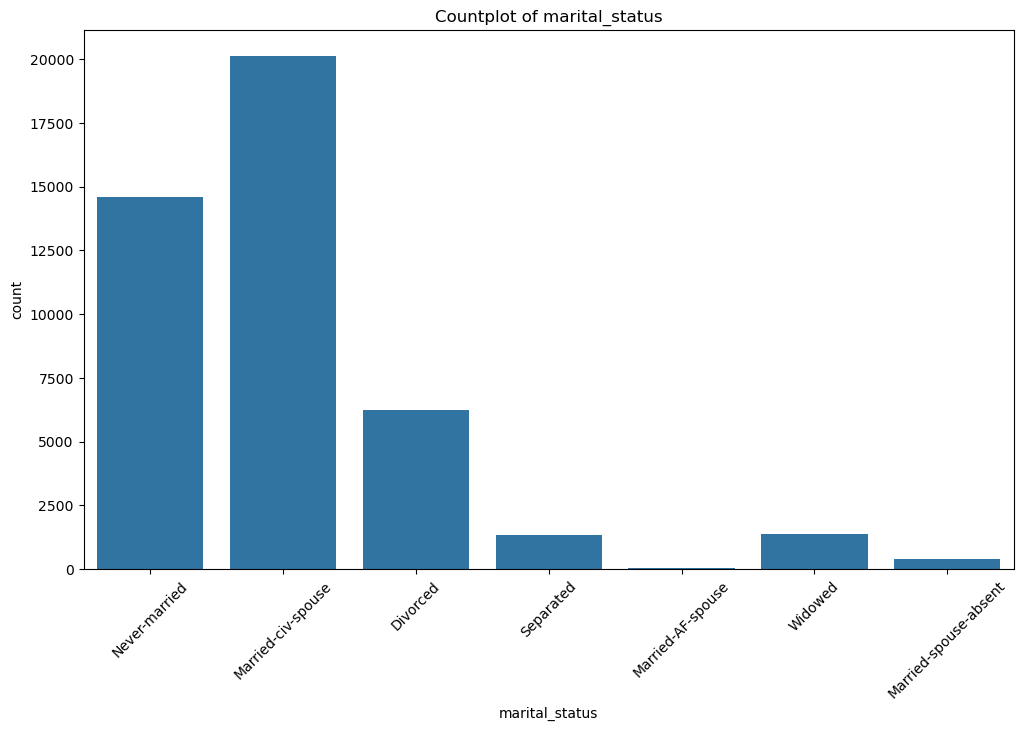

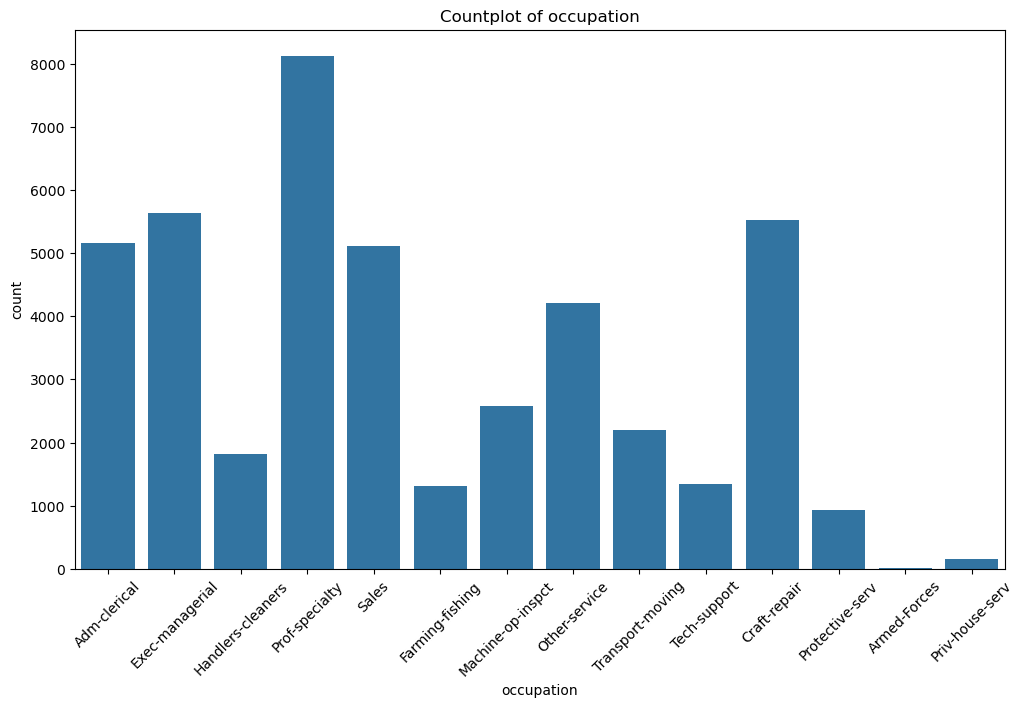

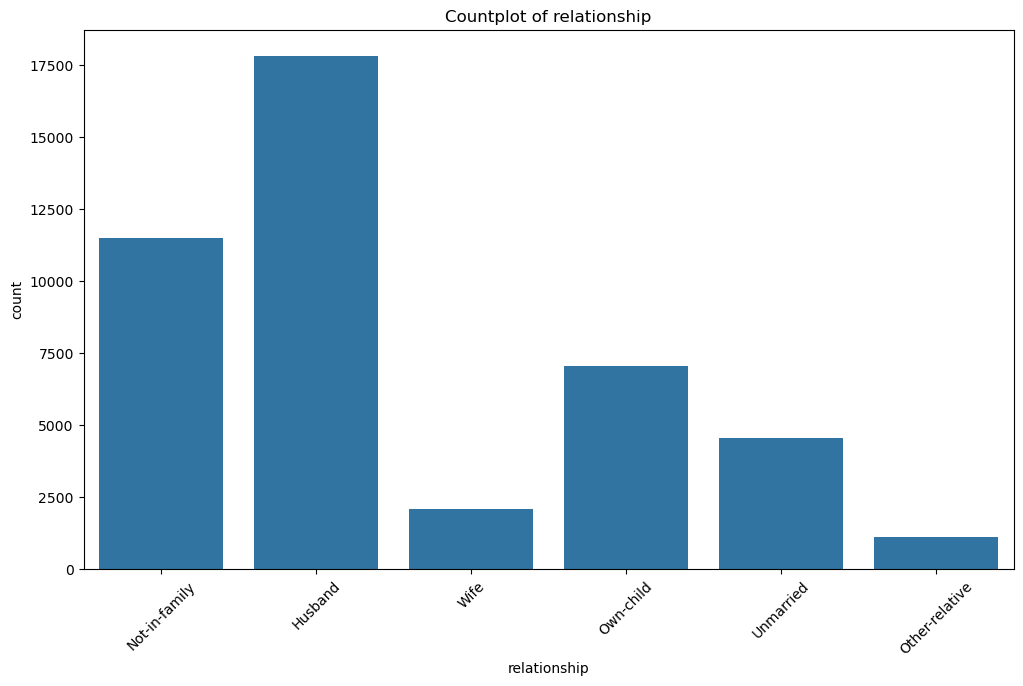

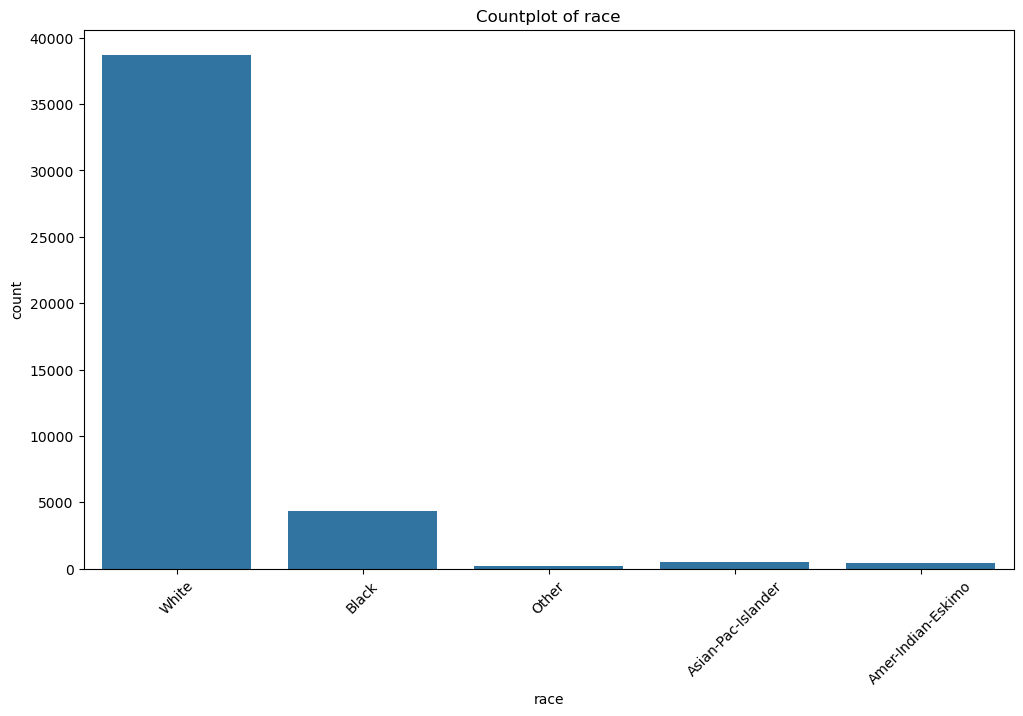

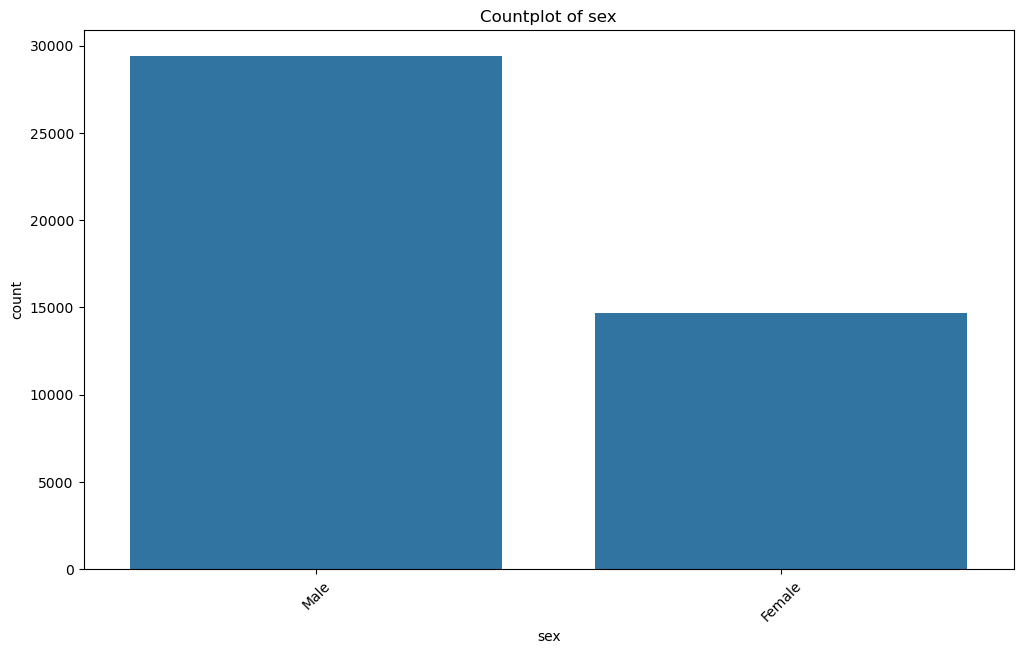

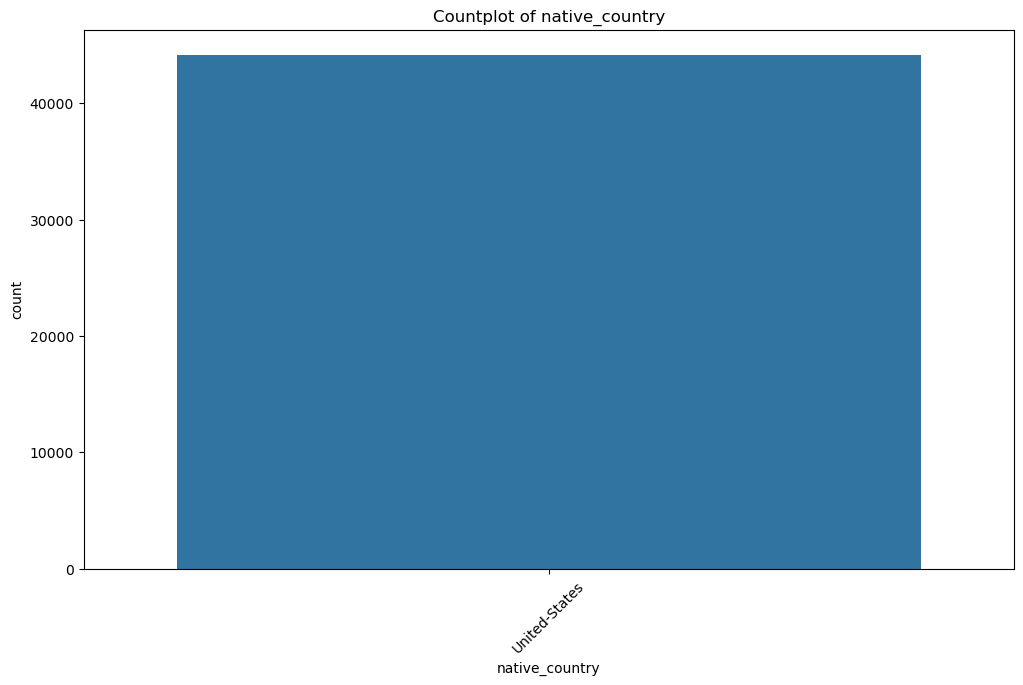

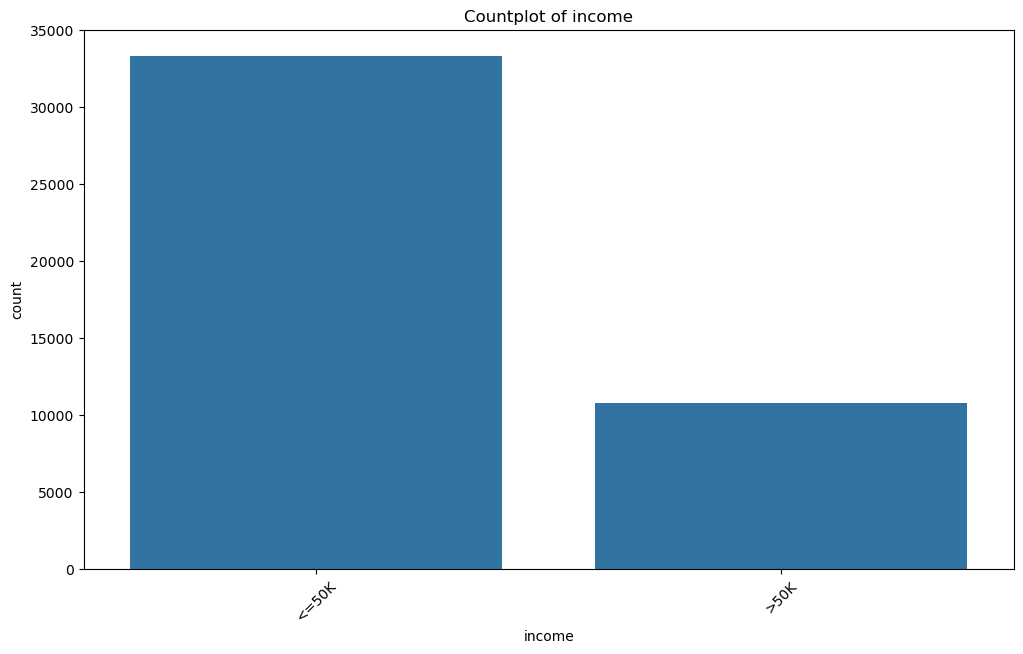

In [43]:
for col in cat_cols:
  plt.figure(figsize=(12,7))
  sns.countplot(x=new_df[col])
  plt.title(f"Countplot of {col}")
  plt.xticks(rotation=45)
  plt.show()

In [44]:
# As there is only one country present we can drop that column

In [45]:
new_df.drop(['native_country'],axis=1,inplace=True)

C:\Users\rockz\AppData\Local\Temp\ipykernel_9548\3546582366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(['native_country'],axis=1,inplace=True)


In [46]:
new_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'income'],
      dtype='object')

In [47]:
cat_cols=new_df.select_dtypes(include='object').columns
print(cat_cols)

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'income'],
      dtype='object')


In [48]:
num_cols

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

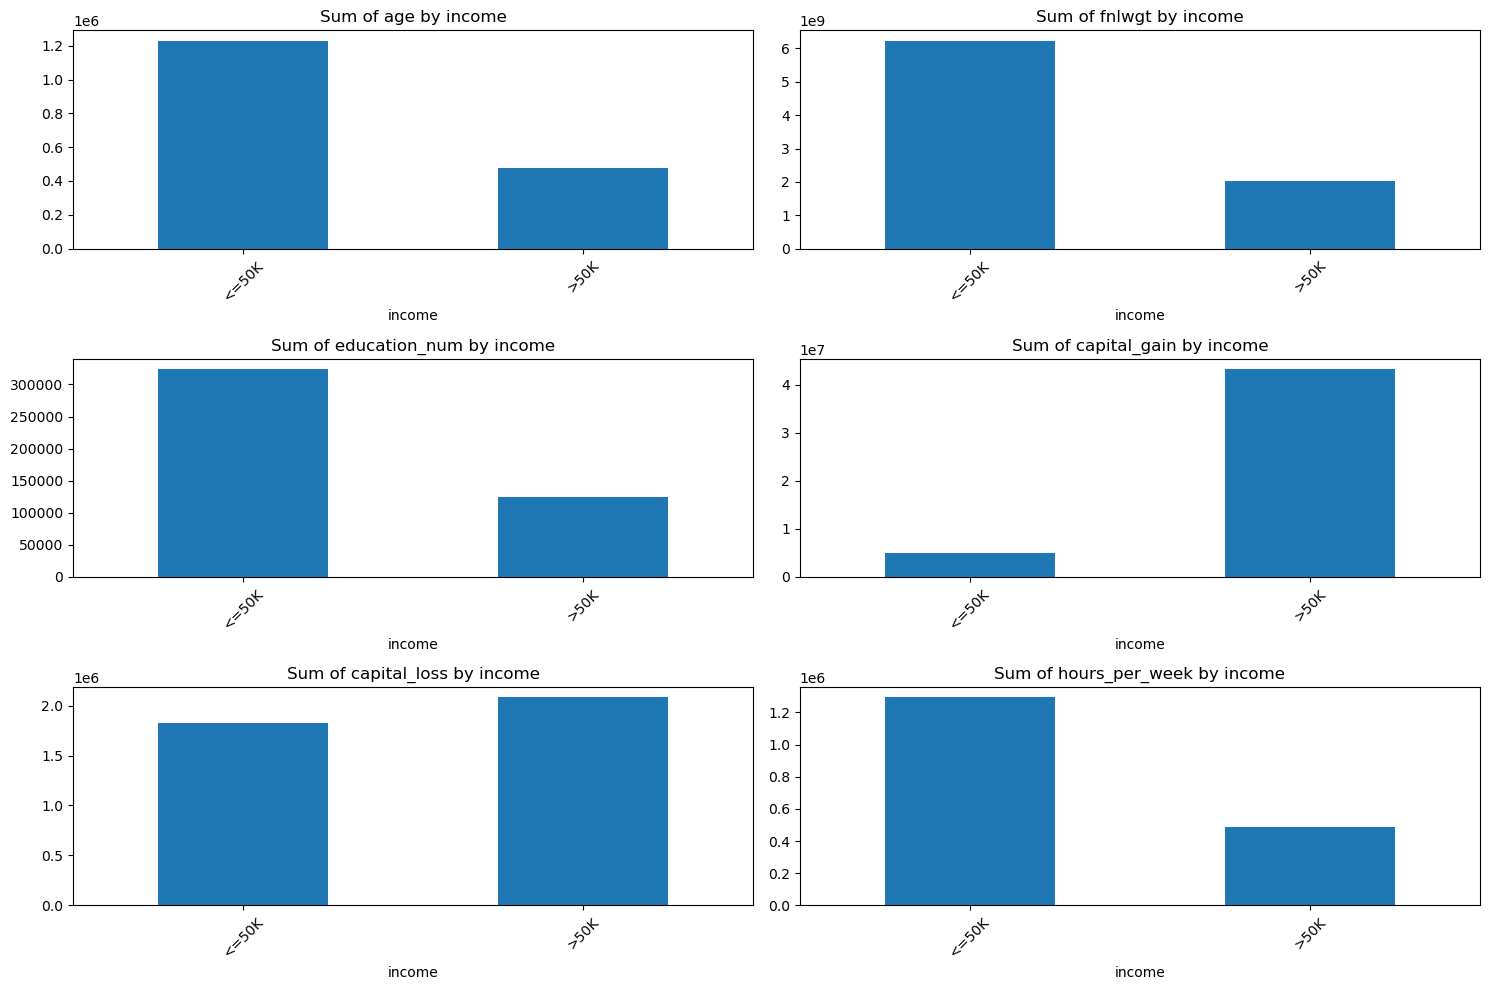

In [49]:
# Bi_variate analysis
# num vs Target
t=1
plt.figure(figsize=(15,10))
for col in num_cols:
  plt.subplot(3,2,t)
  new_df.groupby(['income'])[col].sum().plot(kind='bar')
  plt.xticks(rotation=45)
  plt.title(f"Sum of {col} by income")
  t+=1
plt.tight_layout()
plt.show()

<Figure size 1300x600 with 0 Axes>

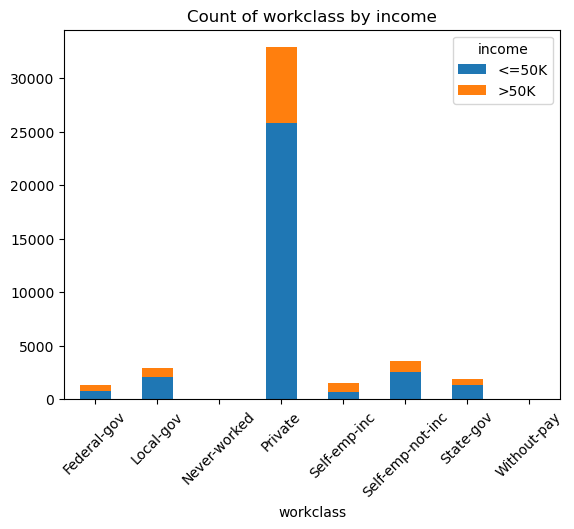

<Figure size 1300x600 with 0 Axes>

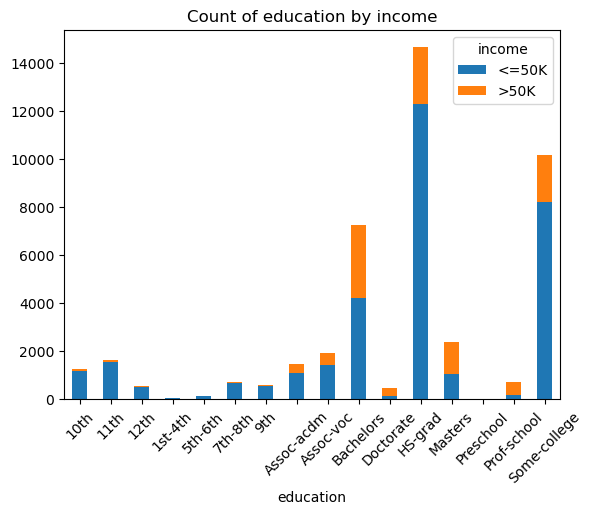

<Figure size 1300x600 with 0 Axes>

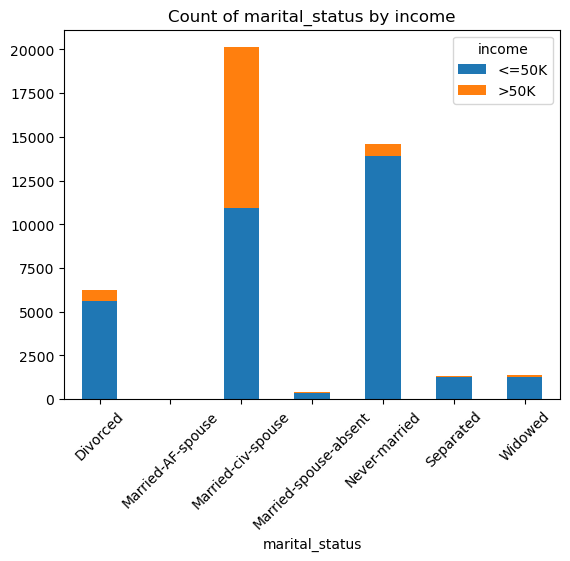

<Figure size 1300x600 with 0 Axes>

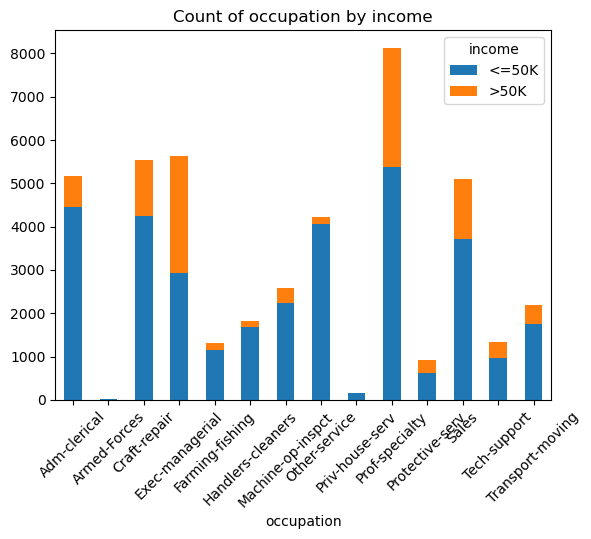

<Figure size 1300x600 with 0 Axes>

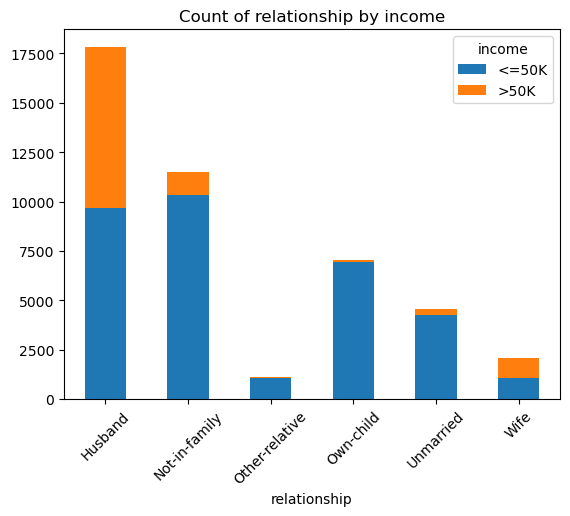

<Figure size 1300x600 with 0 Axes>

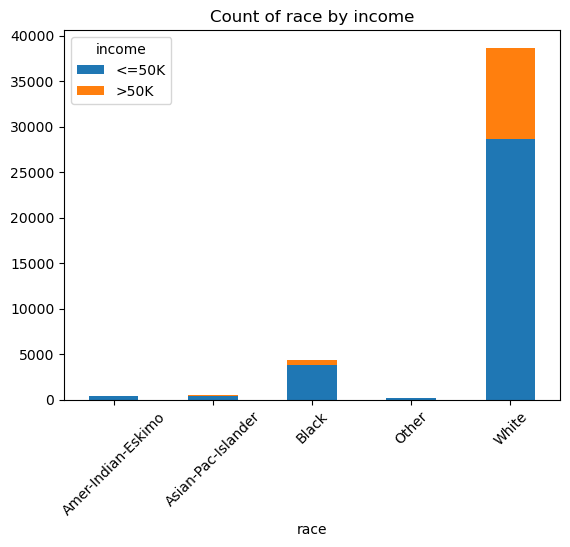

<Figure size 1300x600 with 0 Axes>

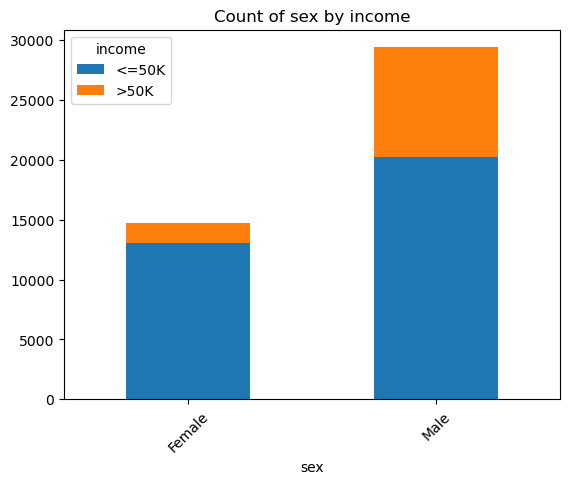

In [50]:
# Cat vs Cat
# t=1
# plt.figure(figsize=(,10))
for col in cat_cols:
  if col!='income':
    # plt.subplot(4,2,t)
    plt.figure(figsize=(13,6))
    (pd.crosstab(new_df[col],new_df['income'])).plot(kind='bar',stacked=True)
    plt.xticks(rotation=45)
    plt.title(f"Count of {col} by income")
    plt.show()
    # t+=1
# plt.tight_layout()
# plt.show()

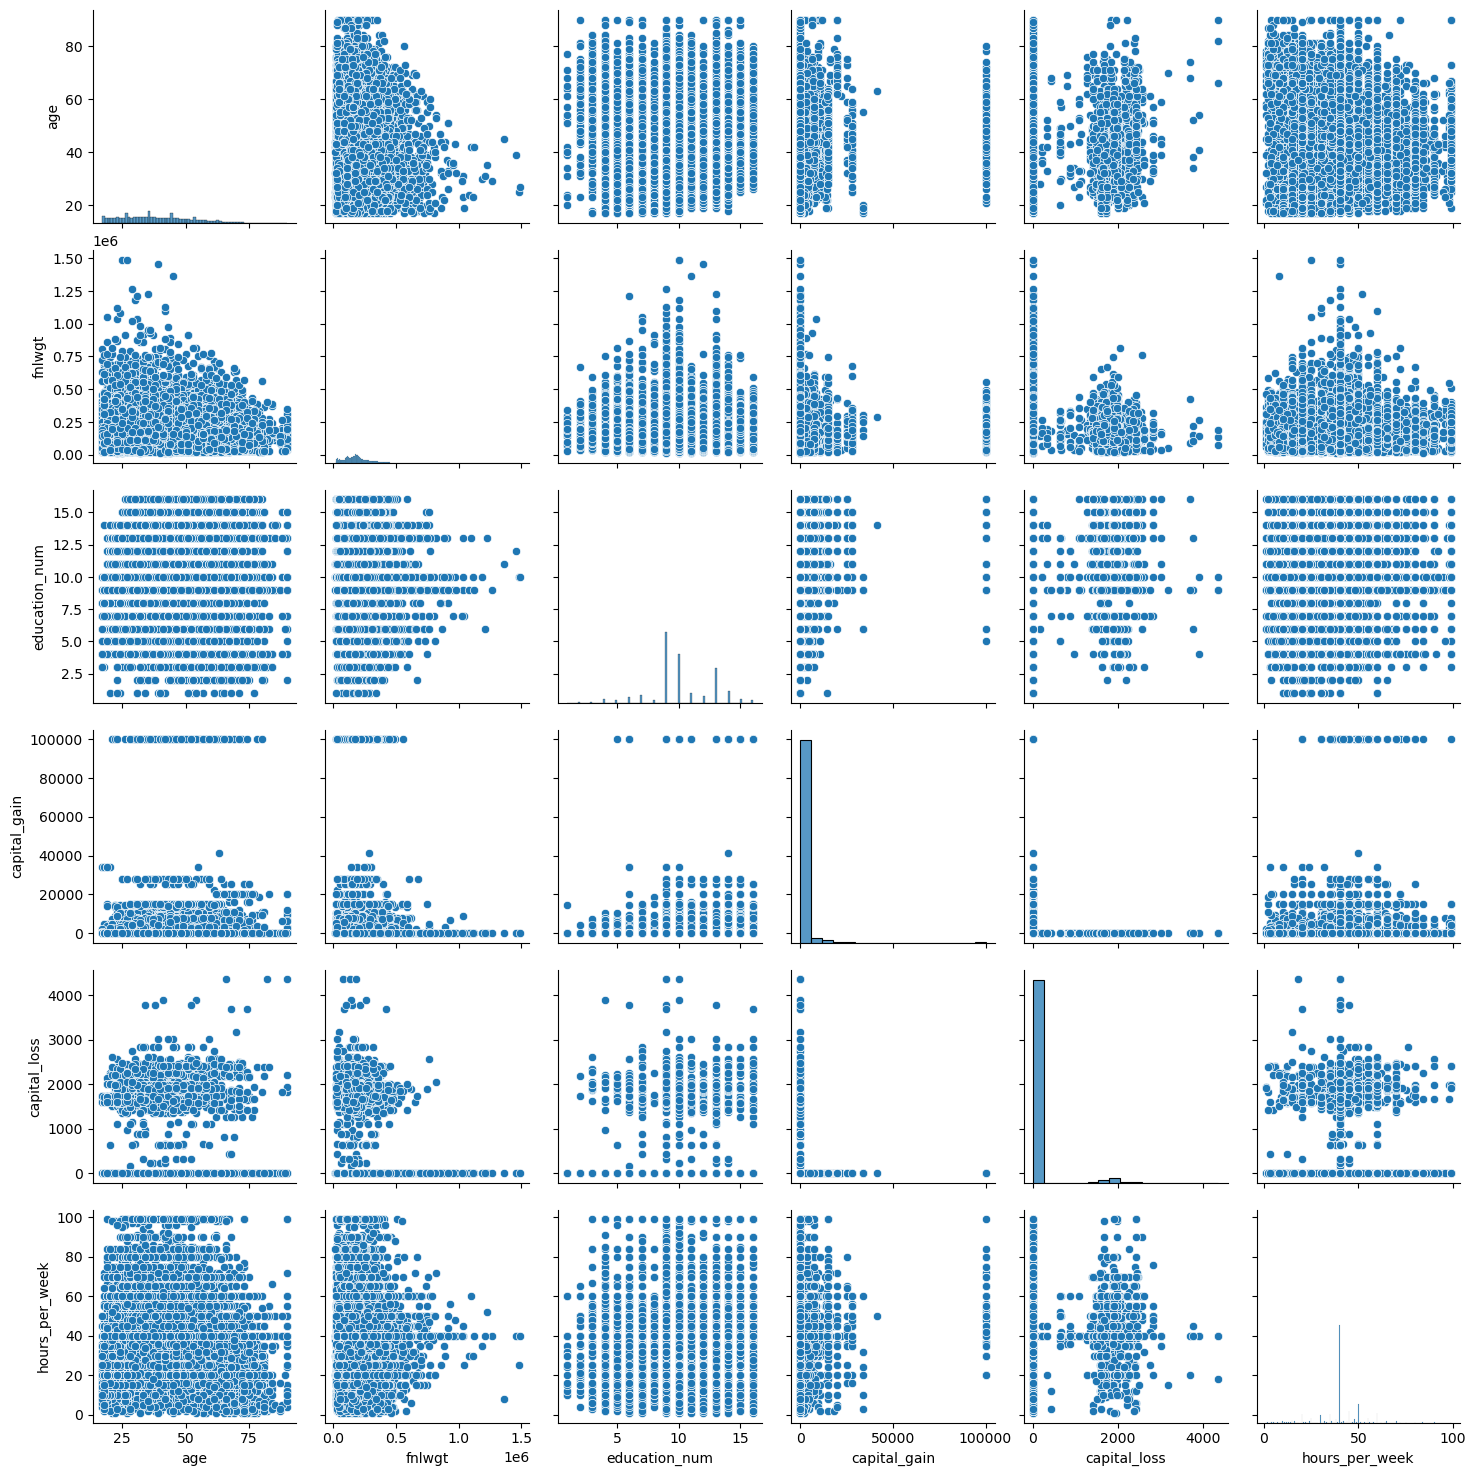

In [51]:
sns.pairplot(new_df)

<Axes: >

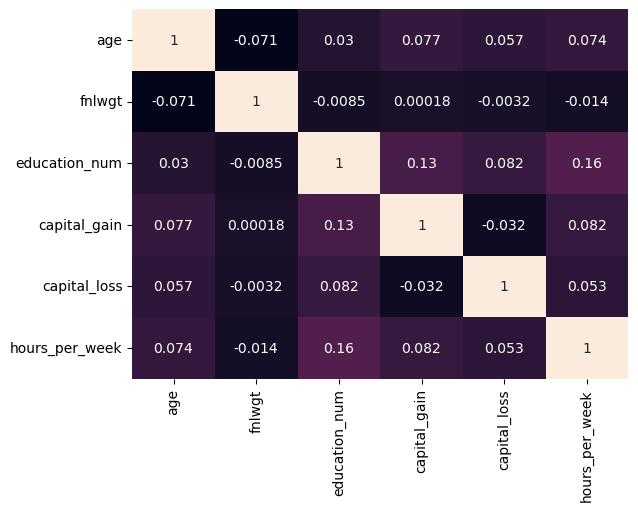

In [52]:
sns.heatmap(new_df[num_cols].corr(),annot=True,cbar=False)

In [53]:
new_df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [54]:
# Statistical Analysis
# Num Vs Target
from scipy.stats import ttest_ind


In [55]:
significant_cols=[]
for col in num_cols:
  grp1=new_df[new_df['income']=='<=50K'][col]
  grp2=new_df[new_df['income']=='>50K'][col]
  tstat,pval=ttest_ind(grp1,grp2)

  if pval<0.05:
    significant_cols.append(col)
    print(f"p value of {col} is {pval}")
    print(f"{col} is a significant column")
    print()
  else:
    print(f"p value of {col} is {pval}")
    print(f"{col} is not a significant column")
    print()
print(f"Significant columns are {significant_cols}")


p value of age is 0.0
age is a significant column

p value of fnlwgt is 0.35605474725678077
fnlwgt is not a significant column

p value of education_num is 0.0
education_num is a significant column

p value of capital_gain is 0.0
capital_gain is a significant column

p value of capital_loss is 4.1218658759217896e-212
capital_loss is a significant column

p value of hours_per_week is 0.0
hours_per_week is a significant column

Significant columns are ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [56]:
significant_cols=[]
for col in num_cols:
  grp1=new_df[new_df['income']=='<=50K'][col]
  grp2=new_df[new_df['income']=='>50K'][col]
  tstat,pval=ttest_ind(grp1,grp2,equal_var=False)

  if pval<0.05:
    significant_cols.append(col)
    print(f"p value of {col} is {pval}")
    print(f"{col} is a significant column")
    print()
  else:
    print(f"p value of {col} is {pval}")
    print(f"{col} is not a significant column")
    print()
print(f"Significant columns are {significant_cols}")


p value of age is 0.0
age is a significant column

p value of fnlwgt is 0.3482606055469387
fnlwgt is not a significant column

p value of education_num is 0.0
education_num is a significant column

p value of capital_gain is 3.4029659531254485e-159
capital_gain is a significant column

p value of capital_loss is 4.257150179567356e-117
capital_loss is a significant column

p value of hours_per_week is 0.0
hours_per_week is a significant column

Significant columns are ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [57]:
# cat vs target
for col in cat_cols:
  print(f"unique values in {col} are {new_df[col].unique()}")
  print(f"number of unique values in {col} are {new_df[col].nunique()}")
  print()

unique values in workclass are ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
number of unique values in workclass are 8

unique values in education are ['Bachelors' 'HS-grad' '11th' 'Masters' 'Some-college' 'Assoc-acdm'
 'Doctorate' '9th' 'Assoc-voc' '10th' '7th-8th' 'Prof-school' '1st-4th'
 'Preschool' '5th-6th' '12th']
number of unique values in education are 16

unique values in marital_status are ['Never-married' 'Married-civ-spouse' 'Divorced' 'Separated'
 'Married-AF-spouse' 'Widowed' 'Married-spouse-absent']
number of unique values in marital_status are 7

unique values in occupation are ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Sales' 'Farming-fishing' 'Machine-op-inspct' 'Other-service'
 'Transport-moving' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
number of unique values in occupation are 14

unique values in relationship are ['Not-in-fami

In [58]:
from scipy.stats import chi2_contingency

In [59]:
for col in cat_cols:
  ct_table=pd.crosstab(new_df[col],new_df['income'])
  chi_stats,p_val,dof,expected=chi2_contingency(ct_table)
  if p_val<0.05:
    significant_cols.append(col)
    print(f"{col} is dependent on income")
  else:
    print(f"{col} is  independent of income")
print(significant_cols)

workclass is dependent on income
education is dependent on income
marital_status is dependent on income
occupation is dependent on income
relationship is dependent on income
race is dependent on income
sex is dependent on income
income is dependent on income
['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'income']


In [60]:
nw_df=new_df[significant_cols]

In [61]:
categoric_cols=nw_df[significant_cols].select_dtypes(include='object').columns
categoric_cols

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'income'],
      dtype='object')

In [62]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [63]:
for col in categoric_cols:
  nw_df[col]=encoder.fit_transform(nw_df[col])


C:\Users\rockz\AppData\Local\Temp\ipykernel_9548\3268288256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nw_df[col]=encoder.fit_transform(nw_df[col])
C:\Users\rockz\AppData\Local\Temp\ipykernel_9548\3268288256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nw_df[col]=encoder.fit_transform(nw_df[col])
C:\Users\rockz\AppData\Local\Temp\ipykernel_9548\3268288256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [64]:
nw_df.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,income
0,39,13,2174,0,40,6,9,4,0,1,4,1,0
1,50,13,0,0,13,5,9,2,3,0,4,1,0
2,38,9,0,0,40,3,11,0,5,1,4,1,0
3,53,7,0,0,40,3,1,2,5,0,2,1,0
5,37,14,0,0,40,3,12,2,3,5,4,0,0


In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x=nw_df.drop(['income'],axis=1)
y=nw_df['income']

# train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(f"Shape of xtrain: {x_train.shape}")
print(f"Shape of xtest: {x_test.shape}")
print(f"Shape of ytrain: {y_train.shape}")
print(f"Shape of ytest: {y_test.shape}")


Shape of xtrain: (35284, 12)
Shape of xtest: (8822, 12)
Shape of ytrain: (35284,)
Shape of ytest: (8822,)


In [67]:
from sklearn.linear_model import LogisticRegression


In [68]:
model1=LogisticRegression()
model1.fit(x_train,y_train)


d:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score

In [70]:
ypred1=model1.predict(x_test)
print(f"print accuracy score of model1: {accuracy_score(y_test,ypred1)}")
print(f"print confusion matrix of model1: {confusion_matrix(y_test,ypred1)}")
print(f"print classification report of model1: {classification_report(y_test,ypred1)}")

print accuracy score of model1: 0.7948311040580367
print confusion matrix of model1: [[6271  369]
 [1441  741]]
print classification report of model1:               precision    recall  f1-score   support

           0       0.81      0.94      0.87      6640
           1       0.67      0.34      0.45      2182

    accuracy                           0.79      8822
   macro avg       0.74      0.64      0.66      8822
weighted avg       0.78      0.79      0.77      8822



In [71]:
print("f1_score", f1_score(y_test,ypred1))

f1_score 0.45018226002430134


In [72]:
 from sklearn.tree import DecisionTreeClassifier
 model2=DecisionTreeClassifier()
 model2.fit(x_train,y_train)


DecisionTreeClassifier()

In [73]:
ypred2=model2.predict(x_test)

In [74]:
print(f"accuracy score of model2: {accuracy_score(y_test,ypred2)}")
print(f"confusion matrix of model2: {confusion_matrix(y_test,ypred2)}")
print(f"classification report of model2: {classification_report(y_test,ypred2)}")

accuracy score of model2: 0.813647698934482
confusion matrix of model2: [[5866  774]
 [ 870 1312]]
classification report of model2:               precision    recall  f1-score   support

           0       0.87      0.88      0.88      6640
           1       0.63      0.60      0.61      2182

    accuracy                           0.81      8822
   macro avg       0.75      0.74      0.75      8822
weighted avg       0.81      0.81      0.81      8822



In [75]:
print("f1_score:",f1_score(y_test,ypred2))

f1_score: 0.6148078725398313


In [76]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()
model3.fit(x_train,y_train)

RandomForestClassifier()

In [77]:
ypred3=model3.predict(x_test)
print(f"accuracy:{accuracy_score(y_test,ypred3)}")
print(f"confusion matrix:{confusion_matrix(y_test,ypred3)}")
print(f"classification report: \n {classification_report(y_test,ypred3)}")

accuracy:0.8456132396282022
confusion matrix:[[6105  535]
 [ 827 1355]]
classification report: 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      6640
           1       0.72      0.62      0.67      2182

    accuracy                           0.85      8822
   macro avg       0.80      0.77      0.78      8822
weighted avg       0.84      0.85      0.84      8822



In [78]:
print("f1_score:",f1_score(y_test,ypred3))


f1_score: 0.6655206286836935


In [79]:
# pip install xgboost

In [80]:
from xgboost import XGBClassifier


In [81]:
model4=XGBClassifier()
model4.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [82]:
ypred4=model4.predict(x_test)
print(f"accuracy:{accuracy_score(y_test,ypred4)}")
print(f"confusion matrix:{confusion_matrix(y_test,ypred4)}")
print(f"classification report: \n {classification_report(y_test,ypred4)}")

accuracy:0.8687372477896169
confusion matrix:[[6235  405]
 [ 753 1429]]
classification report: 
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      6640
           1       0.78      0.65      0.71      2182

    accuracy                           0.87      8822
   macro avg       0.84      0.80      0.81      8822
weighted avg       0.86      0.87      0.86      8822



In [83]:
print("f1_score:",f1_score(y_test,ypred4))

f1_score: 0.7116533864541833


In [84]:
from collections import Counter

counter = Counter(y_train)
scale_pos_weight = counter[0] / counter[1]
print("scale_pos_weight:", scale_pos_weight)


scale_pos_weight: 3.109480549732122


In [85]:
from scipy.stats import randint, uniform
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import RandomizedSearchCV

In [86]:
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'gamma': uniform(0, 0.3),
    'reg_alpha': uniform(0, 0.5)
}


In [87]:
f1 = make_scorer(f1_score, average='binary', pos_label=1)

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=model4,
    param_distributions=param_dist,
    n_iter=30,
    scoring=f1,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)


In [88]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C12F06D670>,
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001C12EEB0CE0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001C12EEB18E0>},
                   random_state=42,
                   scoring=make_scorer(f1_score, response_method='predict', average=binary, pos_label=1),
                   verbose=1)

In [89]:
print("Best Parameters Found:", random_search.best_params_)
print("Best F1 Score on Training (CV):", random_search.best_score_)


Best Parameters Found: {'colsample_bytree': 0.7094287557060203, 'gamma': 0.1909231233791341, 'learning_rate': 0.07287119621526533, 'max_depth': 6, 'n_estimators': 250, 'reg_alpha': 0.3022086896389086, 'subsample': 0.8619523273905019}
Best F1 Score on Training (CV): 0.7159404453062773


In [90]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = random_search.best_estimator_.predict(x_test)

print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6640
           1       0.78      0.65      0.71      2182

    accuracy                           0.87      8822
   macro avg       0.83      0.79      0.81      8822
weighted avg       0.86      0.87      0.86      8822

Confusion Matrix:
[[6231  409]
 [ 763 1419]]


In [91]:
print("F1 Score :", f1_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

F1 Score : 0.7077306733167082
Accuracy: 0.8671503060530492


In [92]:
from xgboost import XGBClassifier

final_model = XGBClassifier(
    colsample_bytree=0.7094,
    gamma=0.1909,
    learning_rate=0.07287,
    max_depth=6,
    n_estimators=250,
    reg_alpha=0.3022,
    subsample=0.862,
    scale_pos_weight=3.1095,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)


In [93]:
final_model.fit(x_train, y_train)


C:\Users\rockz\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [19:43:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7094, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0.1909,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.07287, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, ...)

In [94]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

y_pred = final_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8360915892087962
F1 Score: 0.7241510873712323

Confusion Matrix:
[[5478 1162]
 [ 284 1898]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      6640
           1       0.62      0.87      0.72      2182

    accuracy                           0.84      8822
   macro avg       0.79      0.85      0.80      8822
weighted avg       0.87      0.84      0.84      8822



In [95]:
from sklearn.ensemble import StackingClassifier

In [ ]:
estimators=[
    ('lr',model1),
    ('dt',model2),
    ('rf',model3),
    ('xgb',final_model)
]

In [102]:
stacked_model=StackingClassifier(
    estimators=estimators,
    final_estimator=final_model,
    cv=5,
    n_jobs=-1,
)

In [103]:
stacked_model.fit(x_train, y_train)

C:\Users\rockz\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [20:14:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('dt', DecisionTreeClassifier()),
                               ('rf', RandomForestClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.7094,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              fe...
                                                 gamma=0.1909, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.07287,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=6, max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=250, n_jobs=None,
                                                 num_parallel_tree=None, ...),
                   n_jobs=-1)

In [104]:
ypred=stacked_model.predict(x_test)
print(f"Accuracy of Stacked Model: {accuracy_score(y_test, ypred)}")
print(f"F1_score:, {f1_score(y_test, ypred)}")
print(f"precision:, {precision_score(y_test, ypred)}")

Accuracy of Stacked Model: 0.8280435275447744
F1_score:, 0.7119802544142776
precision:, 0.6077795786061588


In [105]:
print(f"recall:, {recall_score(y_test, ypred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, ypred)}")

recall:, 0.8593033913840513
Confusion Matrix:
[[5430 1210]
 [ 307 1875]]


In [108]:
stacked_model1=StackingClassifier(
    estimators=estimators,
    final_estimator=model3,
    cv=5,
    n_jobs=-1,
)

In [109]:
stacked_model1.fit(x_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('dt', DecisionTreeClassifier()),
                               ('rf', RandomForestClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.7094,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              fe...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.07287,
                                              max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=6,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=250, n_jobs=None,
                                              num_parallel_tree=None, ...))],
                   final_estimator=RandomForestClassifier(), n_jobs=-1)

In [110]:
ypred_stacked=stacked_model1.predict(x_test)
print(f"Accuracy of Stacked Model with RF as final estimator: {accuracy_score(y_test, ypred_stacked)}")
print(f"F1_score: {f1_score(y_test, ypred_stacked)}")
print(f"precision: {precision_score(y_test, ypred_stacked)}")
print(f"recall: {recall_score(y_test, ypred_stacked)}")

Accuracy of Stacked Model with RF as final estimator: 0.8614826569938789
F1_score: 0.6963220675944334
precision: 0.760586319218241
recall: 0.6420714940421631


In [117]:
print(f"Confusion Matrix:\n{confusion_matrix(y_test, ypred_stacked)}")

Confusion Matrix:
[[6199  441]
 [ 781 1401]]


In [111]:
estimators=[
    ('lr',model1),
    ('dt',model2),
    ('rf',model3),
    ('xgb',final_model)
]

In [113]:
stacked_model2=StackingClassifier(
    estimators=estimators,
    final_estimator=final_model,
    cv=5,
    n_jobs=-1,
)

In [114]:
stacked_model2.fit(x_train, y_train)

C:\Users\rockz\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [00:12:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('dt', DecisionTreeClassifier()),
                               ('rf', RandomForestClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.7094,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              fe...
                                                 gamma=0.1909, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.07287,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=6, max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=250, n_jobs=None,
                                                 num_parallel_tree=None, ...),
                   n_jobs=-1)

In [115]:
ypred_stacked2=stacked_model2.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test,ypred_stacked2)}")
print(f"F1_score: {f1_score(y_test,ypred_stacked2)}")
print(f"precision: {precision_score(y_test,ypred_stacked2)}")
print(f"recall: {recall_score(y_test,ypred_stacked2)}")


Accuracy: 0.8255497619587395
F1_score: 0.7086882453151618
precision: 0.6036762334730732
recall: 0.8579285059578369


In [116]:
print(f"Confusion Matrix:\n{confusion_matrix(y_test, ypred_stacked2)}")

Confusion Matrix:
[[5411 1229]
 [ 310 1872]]


In [118]:
from sklearn.metrics import roc_auc_score, roc_curve

In [119]:
y_pred_proba=stacked_model2.predict_proba(x_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc}")

ROC AUC Score: 0.9237592901394763


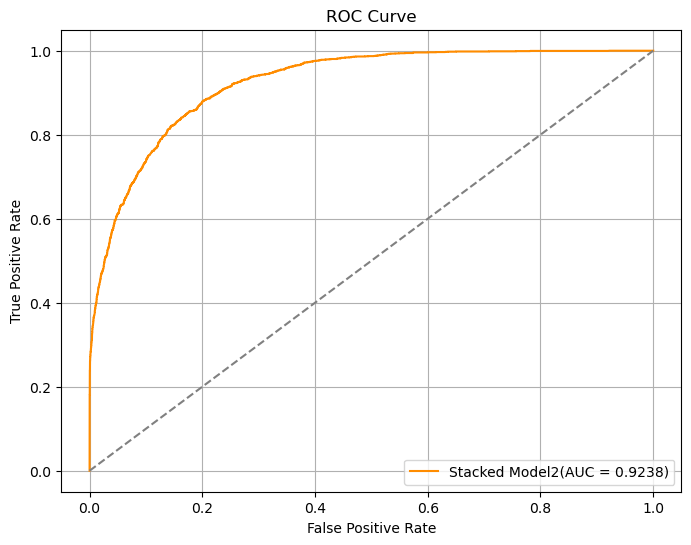

In [122]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Stacked Model2(AUC = {roc_auc:.4f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [123]:
model_dict = {
    "Logistic Regression": model1,
    "Decision Tree": model2,
    "Random Forest": model3,
    "XGBoost": model4,
    "Tuned XGBoost": final_model,
    "Stacked Model 1": stacked_model,
    "Stacked Model 2": stacked_model1,
    "Stacked Model 3": stacked_model2
}


Error with Stacked Model 1: This StackingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.


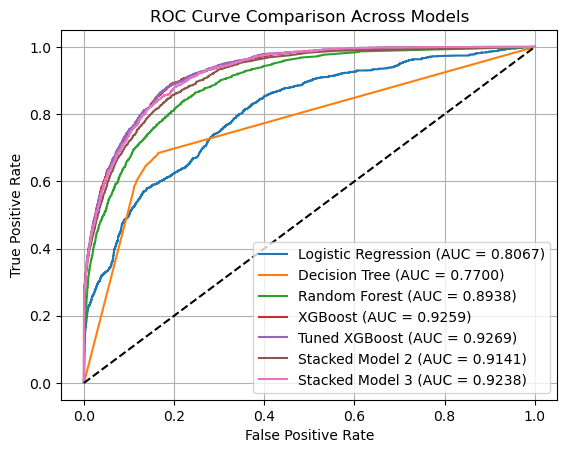

In [125]:
for name, model in model_dict.items():
    try:
        y_proba = model.predict_proba(x_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.4f})")
    except Exception as e:
        print(f"Error with {name}: {e}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison Across Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [126]:
from sklearn.ensemble import VotingClassifier


In [127]:
ensemble_model = VotingClassifier(
    estimators=[
        ('xgb', final_model),
        ('rf', model3) 
    ],
    voting='soft',
    n_jobs=-1
)

In [128]:
ensemble_model.fit(x_train,y_train)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.7094,
                                            device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None,
                                            feature_weights=None, gamma=0.1909,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.07287, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=250, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('rf', RandomForestClassifier())],
                 n_jobs=-1, voting='soft')

In [129]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

y_pred = ensemble_model.predict(x_test)
y_proba = ensemble_model.predict_proba(x_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, pos_label=1))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Accuracy: 0.853094536386307
F1 Score: 0.7128932210899424
ROC AUC Score: 0.9199367359446955


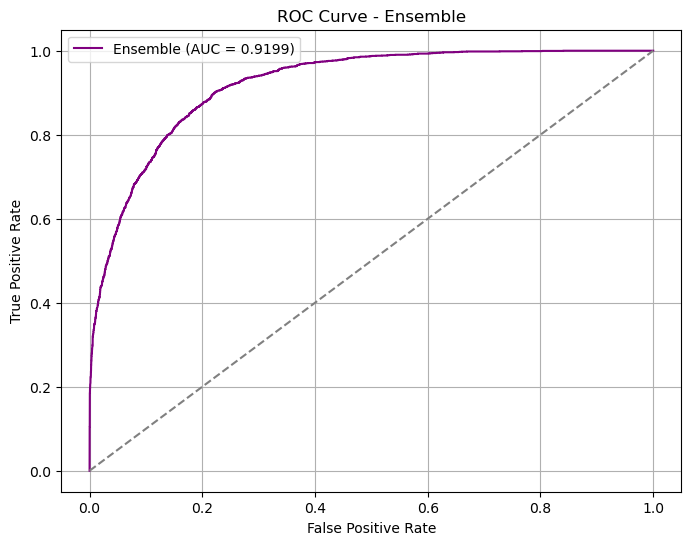

In [131]:


fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Ensemble (AUC = {roc_auc_score(y_test, y_proba):.4f})", color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Ensemble")
plt.legend()
plt.grid(True)
plt.show()


* Here all the models performed well except the base models but the tuned model which is XGBoost model gave ROC AUC as 0.9269
* Which is better comparing to other models. 
* So in the next steps, will try to improve the F1_score here

In [132]:
y_proba = final_model.predict_proba(x_test)[:, 1]

# Tring thresholds from 0.1 to 0.9
best_threshold = 0.5
best_f1 = 0

for threshold in np.arange(0.1, 0.9, 0.01):
    y_pred_thresh = (y_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_thresh, pos_label=1)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Best Threshold: {best_threshold:.2f}")
print(f"Best F1 Score: {best_f1:.4f}")

Best Threshold: 0.60
Best F1 Score: 0.7316


In [133]:
# Using the best threshold found
y_pred_final = (y_proba >= best_threshold).astype(int)

print("Precision:", precision_score(y_test, y_pred_final, pos_label=1))
print("Recall:", recall_score(y_test, y_pred_final, pos_label=1))
print("F1 Score:", f1_score(y_test, y_pred_final, pos_label=1))


Precision: 0.6761275272161742
Recall: 0.7969752520623281
F1 Score: 0.7315944467816575


### Final Conclusion:

After applying rigorous model tuning, handling class imbalance, and optimizing the classification threshold, our **final XGBoost model** achieved an impressive:

- **Precision:** 0.6761  
- **Recall:** 0.7970  
- **F1 Score:** 0.7316  

This result reflects a well-balanced classifier that effectively identifies high-income individuals (`>50K`) with both accuracy and robustness. The project showcases end-to-end data science skills — from data preprocessing and feature engineering to advanced ensemble learning and model evaluation.

**This model is now ready for deployment or integration into a decision support system.**
